# CREDIT SCORE CLASSIFICATION

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

### Read the dataset into python environment

In [2]:
df=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Internship\credit.csv")
pd.set_option('display.max_columns',None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset description

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid 

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments 

Amount_invested_monthly: Represents the monthly amount invested by the customer 

Payment_Behaviour: Represents the payment behavior of the customer 

Monthly_Balance: Represents the monthly balance amount of the customer

Credit_Score: Represents the credit score of the customer (Poor, Standard, Good)

# Exploratory Data Analysis (EDA)

### Check basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

***Inference : Dataset has 28 features and 100000 entries. Among that, 21 features are numerical (18 float and 3 integer) and 7 are categorical features.***

### Check for duplicates

In [4]:
df.duplicated().sum()

0

***Inference : There are no duplicate entries in the dataset.***

### Check for null values 

In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

***Inference : There are no null values present in the dataset.***

### Check for unique values

In [6]:
(df.nunique()).sort_values(ascending=False)

ID                          100000
Credit_Utilization_Ratio    100000
Monthly_Balance              98494
Monthly_Inhand_Salary        13241
Customer_ID                  12500
SSN                          12500
Annual_Income                12488
Amount_invested_monthly      12261
Outstanding_Debt             12203
Total_EMI_per_month          11890
Name                         10128
Type_of_Loan                  6261
Changed_Credit_Limit          3452
Credit_History_Age             404
Delay_from_due_date             63
Age                             43
Interest_Rate                   34
Num_of_Delayed_Payment          26
Num_Credit_Inquiries            18
Occupation                      15
Num_Credit_Card                 12
Num_Bank_Accounts               12
Num_of_Loan                     10
Month                            8
Payment_Behaviour                6
Credit_Mix                       3
Payment_of_Min_Amount            3
Credit_Score                     3
dtype: int64

***Inference : Features 'ID' and 'Credit_Utilization_Ratio' have full of unique values. Also there are 12500 unique customers.***

### Check for outliers

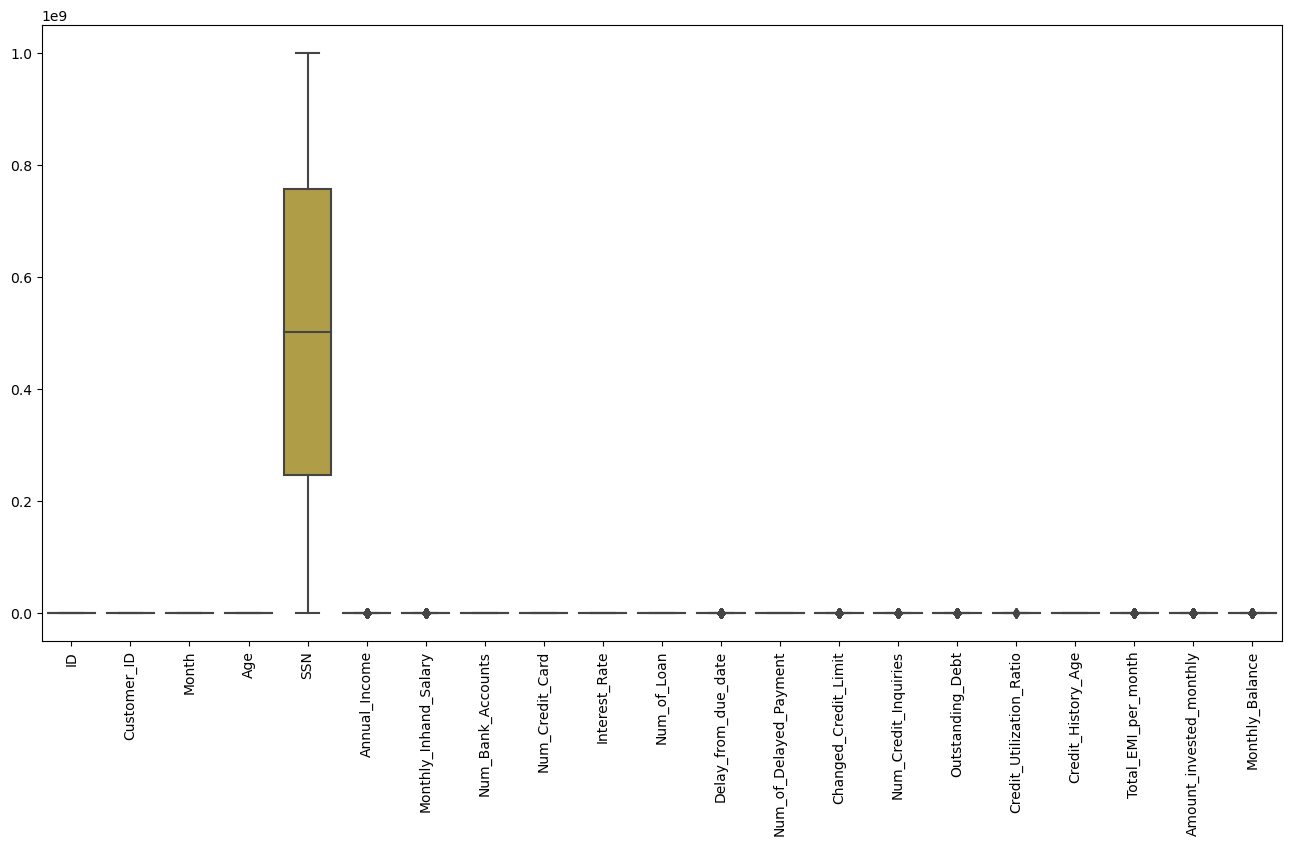

In [7]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Inference : Outliers are present in 10 no. of features.***

In [8]:
outlier_columns=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

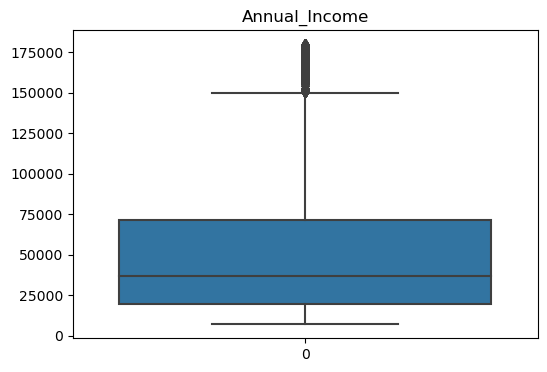

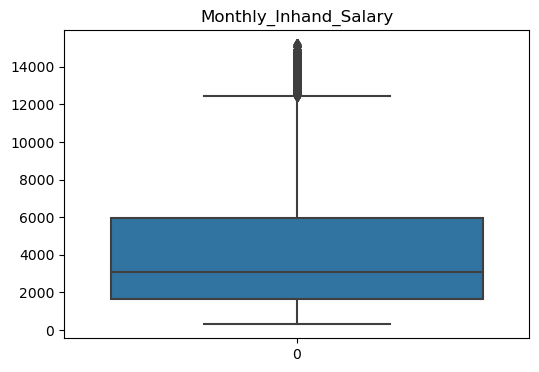

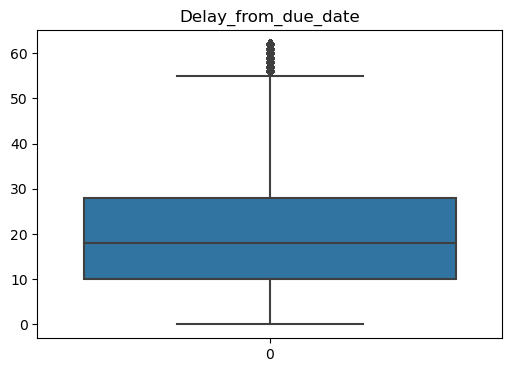

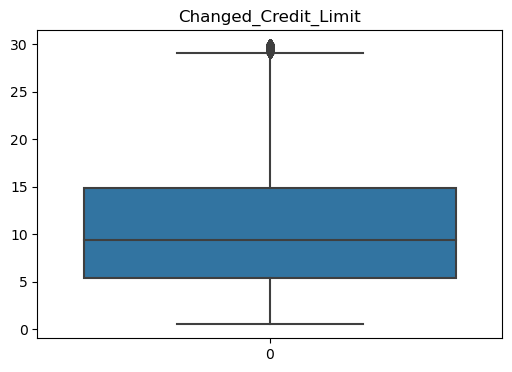

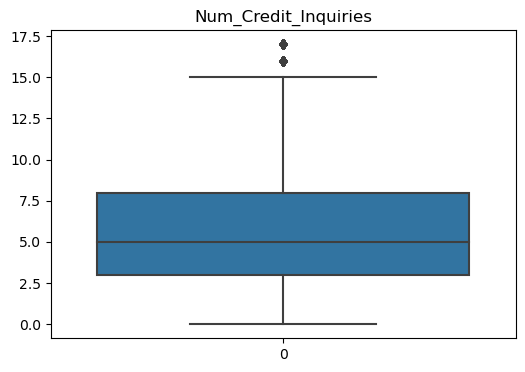

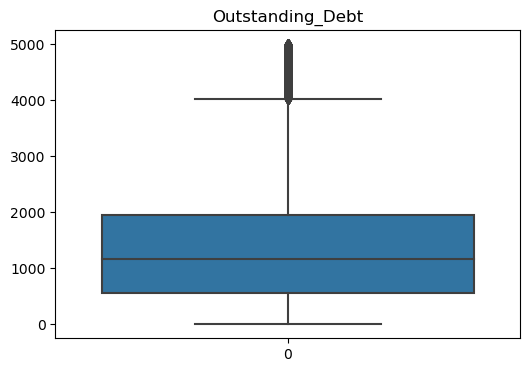

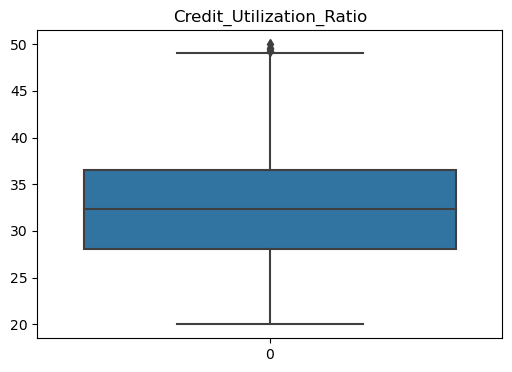

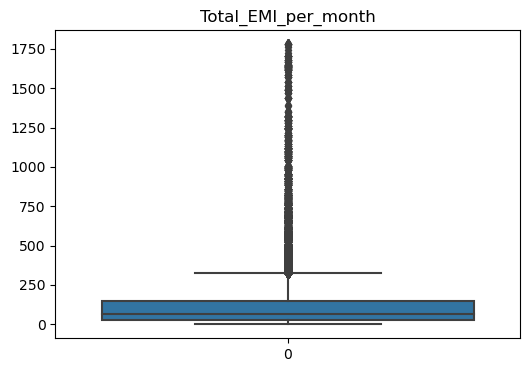

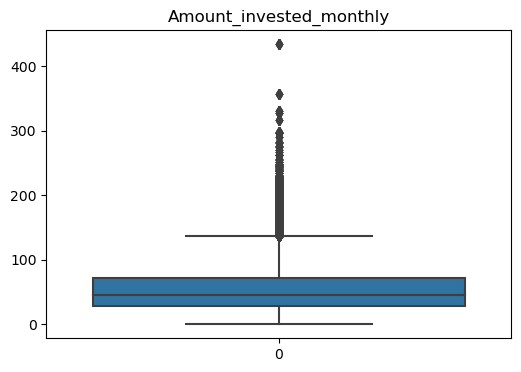

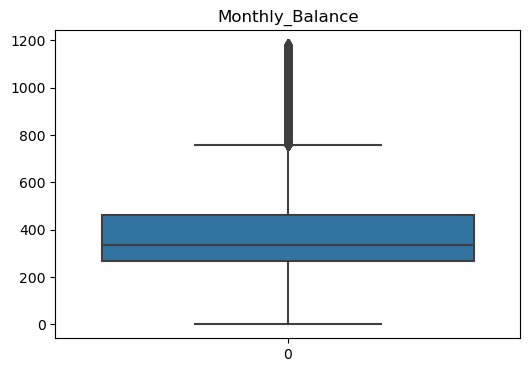

In [9]:
for i in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

***Inference : In every 10 features, outliers are seen above upper fence only (high outliers).***

### Check statistical summary

In [10]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Distribution of features

Add percentages on top of bars

In [11]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)

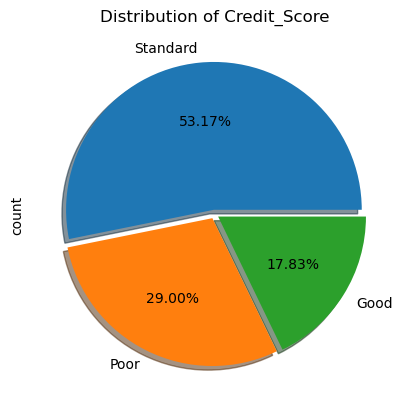

In [12]:
df["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])
plt.title('Distribution of Credit_Score')
plt.show()

***Inference : Data is imbalanced. Majority of customers have 'Standard' credit score while a small number of customers have 'Good' credit score.***

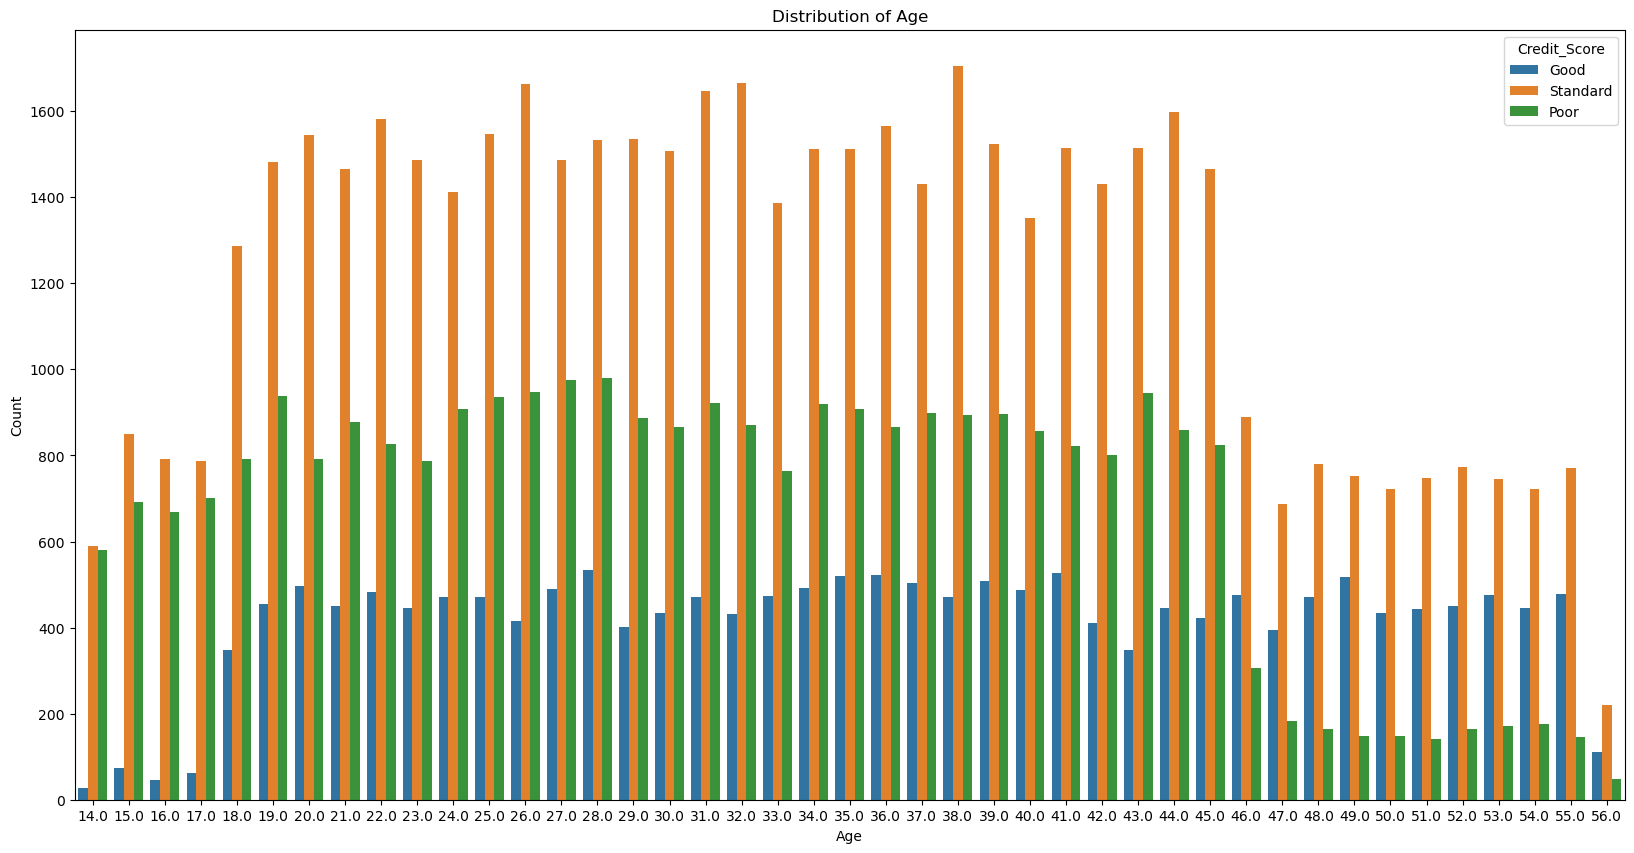

In [13]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Age',data=df,hue='Credit_Score')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Inference : Middle aged customers are more in number compared to young and old aged customers. Among old people, very few percentage have 'Poor' credit score whereas the customers with age less than 18 have more percentage of 'Poor' credit score.***

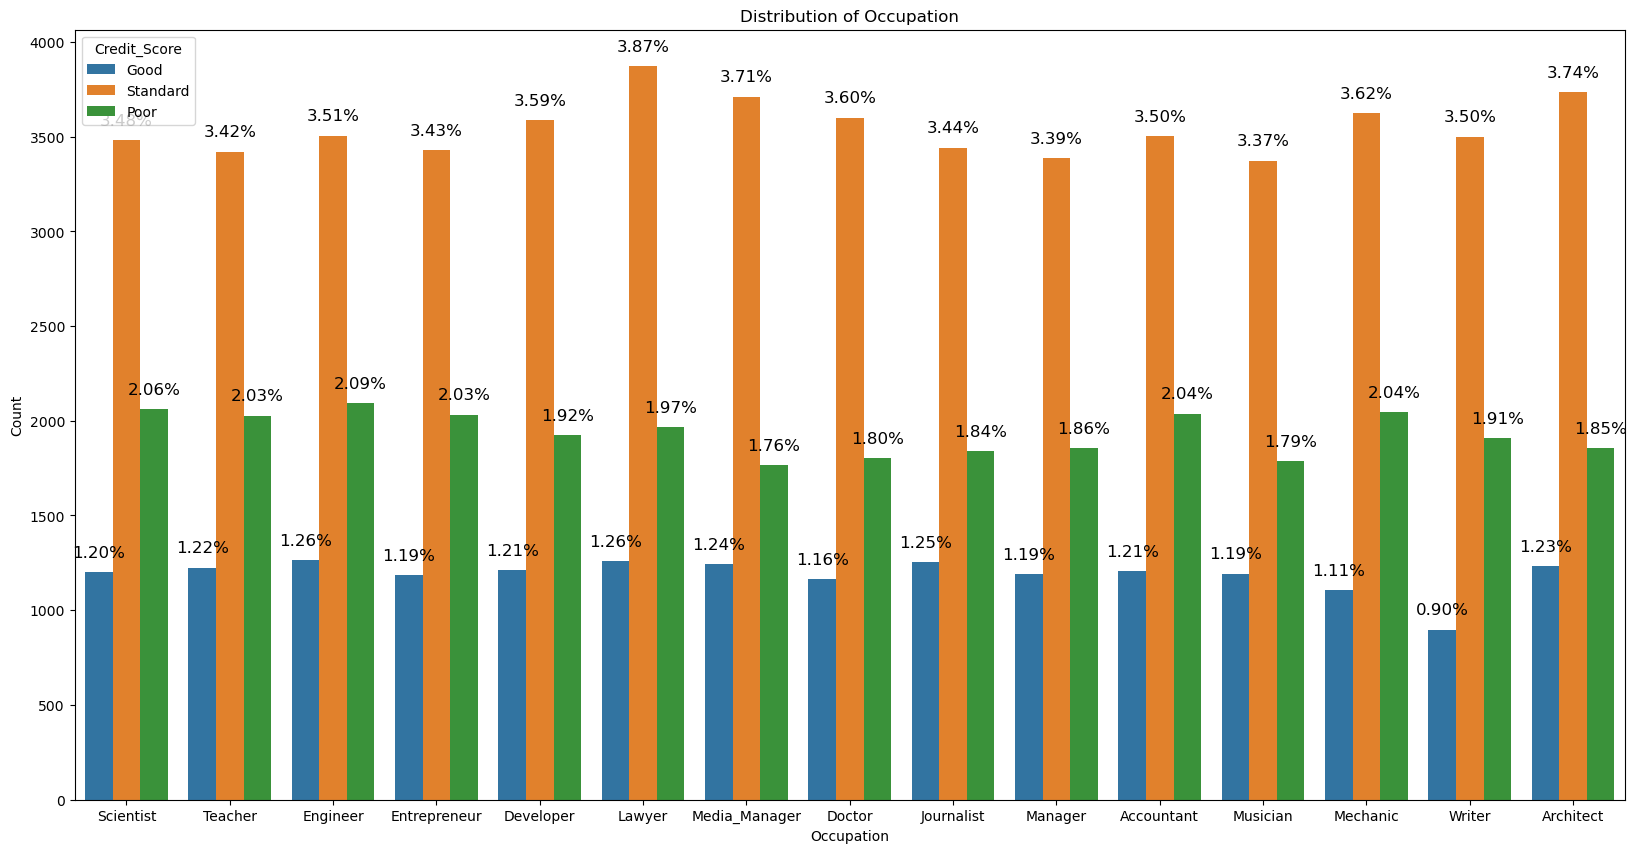

In [14]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Occupation',data=df,hue='Credit_Score')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
percentage_without_hue(ax, df['Occupation'], 0,80,12)
plt.show()

***Inference : Among all the occupations, all the three credit scores are almost equally distributed.***

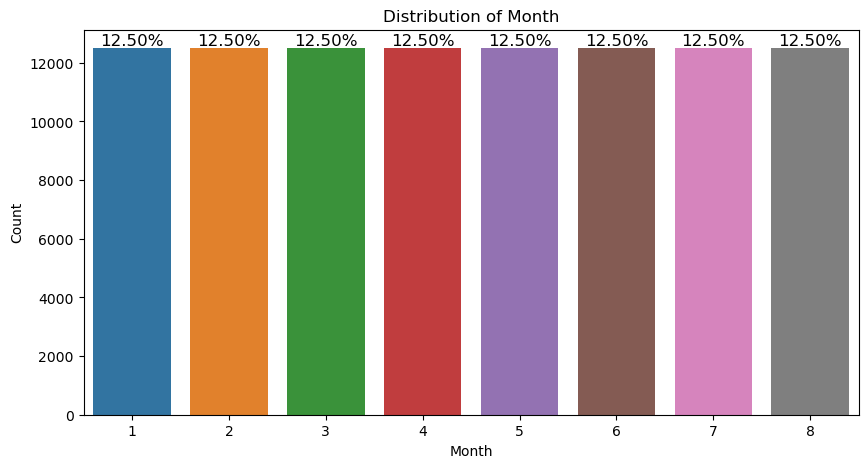

In [15]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Month',data=df)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
percentage_without_hue(ax, df['Month'], 0,80,12)
plt.show()

***Inference : Data is uniformly distributed across all the 8 months. i.e., Every 8 month has equal number of entries.***

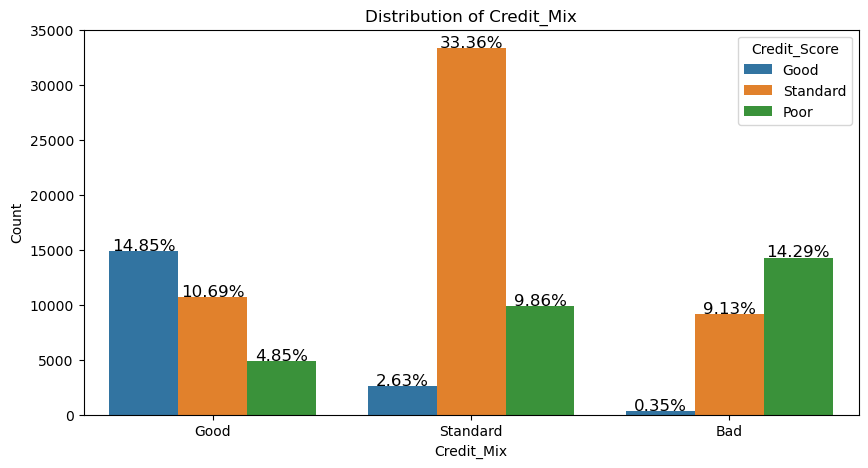

In [16]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Credit_Mix',data=df,hue='Credit_Score')
plt.title('Distribution of Credit_Mix')
plt.xlabel('Credit_Mix')
plt.ylabel('Count')
percentage_without_hue(ax, df['Credit_Mix'], 0,80,12)
plt.show()

***Inference : Both 'Credit_Mix' and 'Credit_Score' are highly correlated. i.e., In the case of customers with Good 'Credit_Mix', percentage of Good 'Credit_Score' is more and so on.***

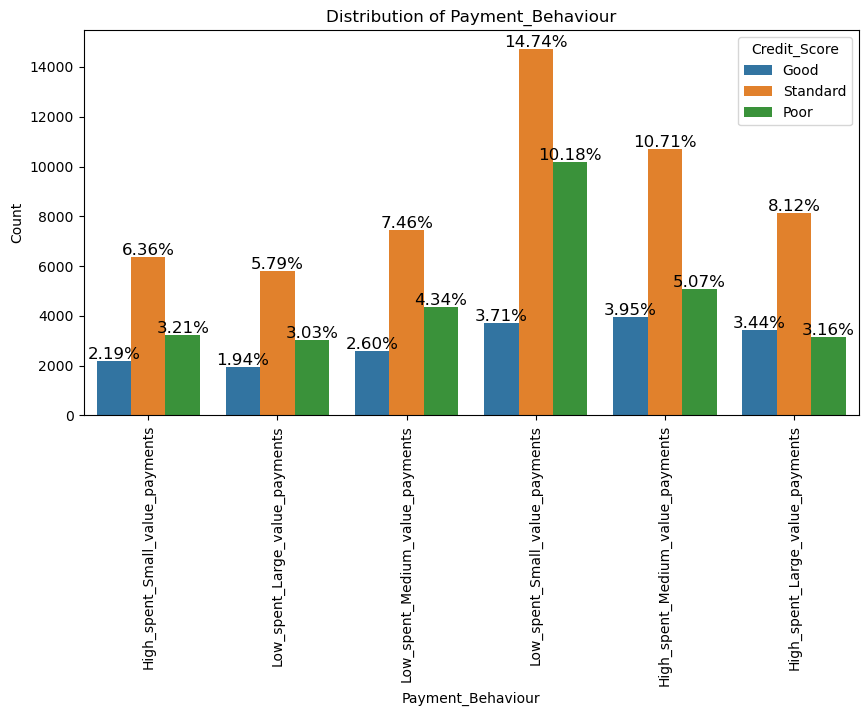

In [17]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Payment_Behaviour',data=df,hue='Credit_Score')
plt.title('Distribution of Payment_Behaviour')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
percentage_without_hue(ax, df['Payment_Behaviour'], 0,80,12)
plt.xticks(rotation=90)
plt.show()

***Inference : Among five payment behaviours, 'Standard' credit score percentage is highest and 'Good' pecentage is the least. Where as in 'High_spent_Large_value_payments' 'Standard' comes first, then 'Good' and at last 'Poor'.***

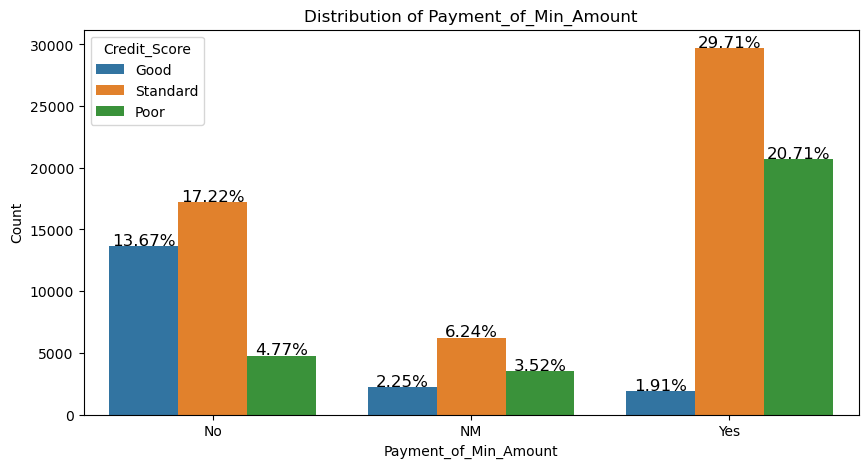

In [18]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Payment_of_Min_Amount',data=df,hue='Credit_Score')
plt.title('Distribution of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
percentage_without_hue(ax, df['Payment_of_Min_Amount'], 0,80,12)
plt.show()

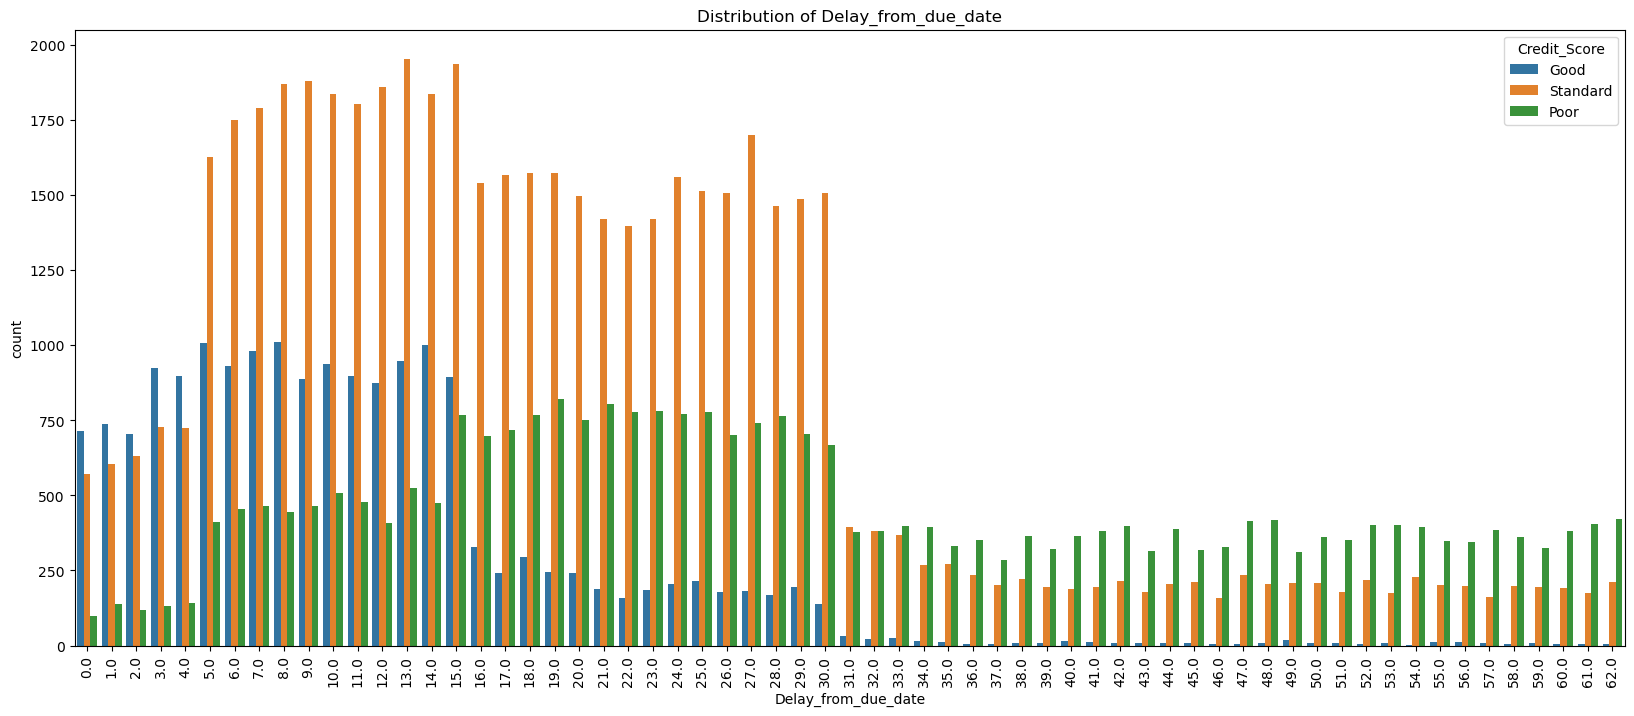

In [19]:
plt.figure(figsize=(20, 8))
plt.title('Distribution of Delay_from_due_date')
sns.countplot(x='Delay_from_due_date',data=df,hue='Credit_Score')
plt.xticks(rotation=90)
plt.show()

***Inference : When 'Delay_from_due_date' is low, 'Good' credit score percentage is more than other two whereas when 'Delay_from_due_date' is high 'Poor' credit score percentage is more than other two.***

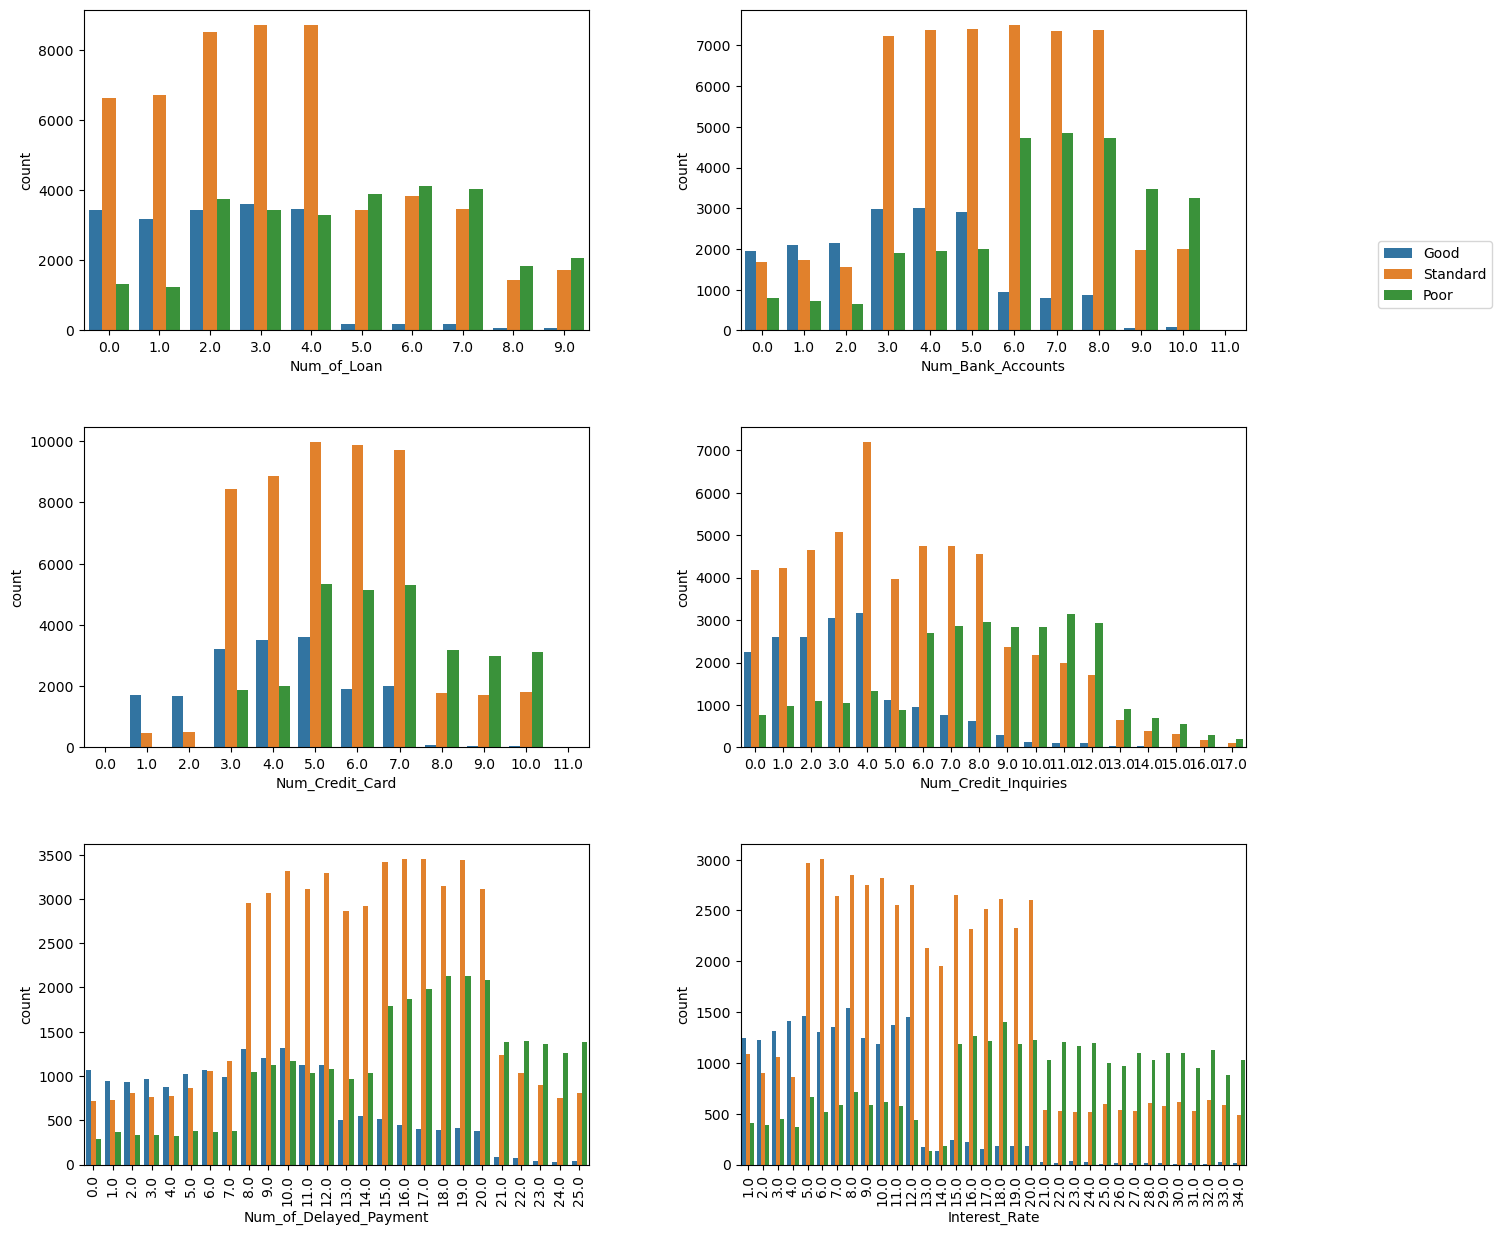

In [20]:
fig,axes = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(x='Num_of_Loan',data=df,ax=axes[0,0],hue='Credit_Score')
sns.countplot(x='Num_Bank_Accounts',data=df,ax=axes[0,1],hue='Credit_Score')
sns.countplot(x='Num_Credit_Card',data=df,ax=axes[1,0],hue='Credit_Score')
sns.countplot(x='Num_Credit_Inquiries',data=df,ax=axes[1,1],hue='Credit_Score')
sns.countplot(x='Num_of_Delayed_Payment',data=df,ax=axes[2,0],hue='Credit_Score')
sns.countplot(x='Interest_Rate',data=df,ax=axes[2,1],hue='Credit_Score')
axes[0,1].legend(bbox_to_anchor=(1.5, 0.3), loc='upper right')
axes[0,0].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[2,0].get_legend().remove()
axes[2,1].get_legend().remove()
plt.sca(axes[2, 0])
plt.xticks(rotation=90)
plt.sca(axes[2, 1])
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : As number of loans, bank accounts, credit cards, credit inquiries, delayed payment and rate of interest increases, number of 'Poor' credit score is more than other two credit scores.***

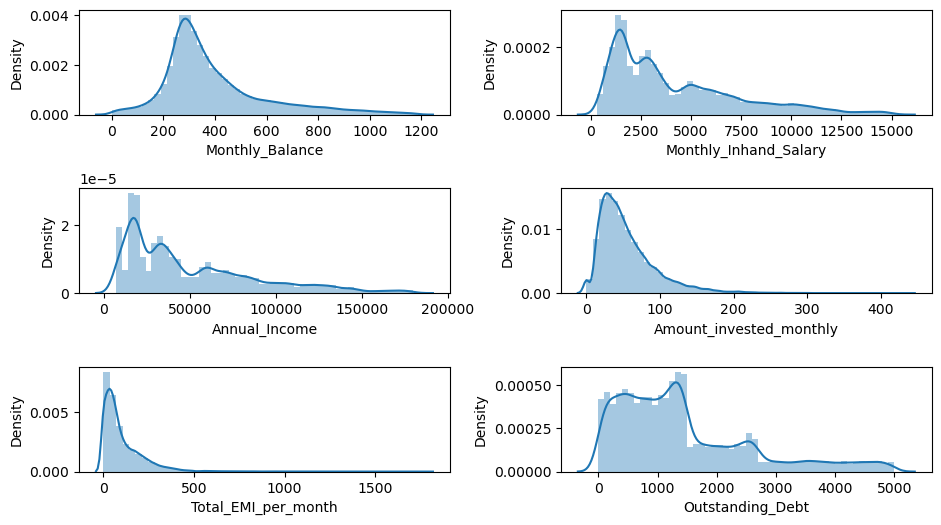

In [21]:
fig,axes = plt.subplots(3, 2, figsize=(11, 6))
sns.distplot(df["Monthly_Balance"], ax=axes[0,0])
sns.distplot(df["Monthly_Inhand_Salary"], ax=axes[0,1])
sns.distplot(df["Annual_Income"], ax=axes[1,0])
sns.distplot(df["Amount_invested_monthly"], ax=axes[1,1])
sns.distplot(df["Total_EMI_per_month"], ax=axes[2,0])
sns.distplot(df["Outstanding_Debt"], ax=axes[2,1])
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : All the six distributions are right skewed / positive skewed distributions. i.e., Majority of customers earn and spend small amount of money. Also, EMI amount of majority of customers is zero. Number of customers with large amount of debt is also low.***

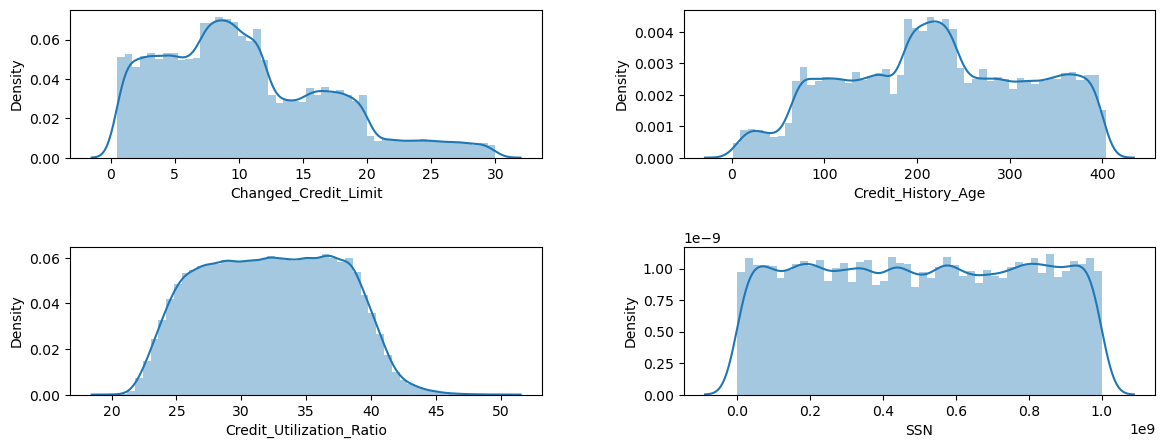

In [22]:
fig,axes = plt.subplots(2, 2, figsize=(14,5))
sns.distplot(df["Changed_Credit_Limit"], ax=axes[0,0])
sns.distplot(df["Credit_History_Age"], ax=axes[0,1])
sns.distplot(df["Credit_Utilization_Ratio"], ax=axes[1,0])
sns.distplot(df["SSN"], ax=axes[1,1])
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : Distribution of 'Changed_Credit_Limit' is moderately symmetric and all other three are approximately symmetric distributions.***

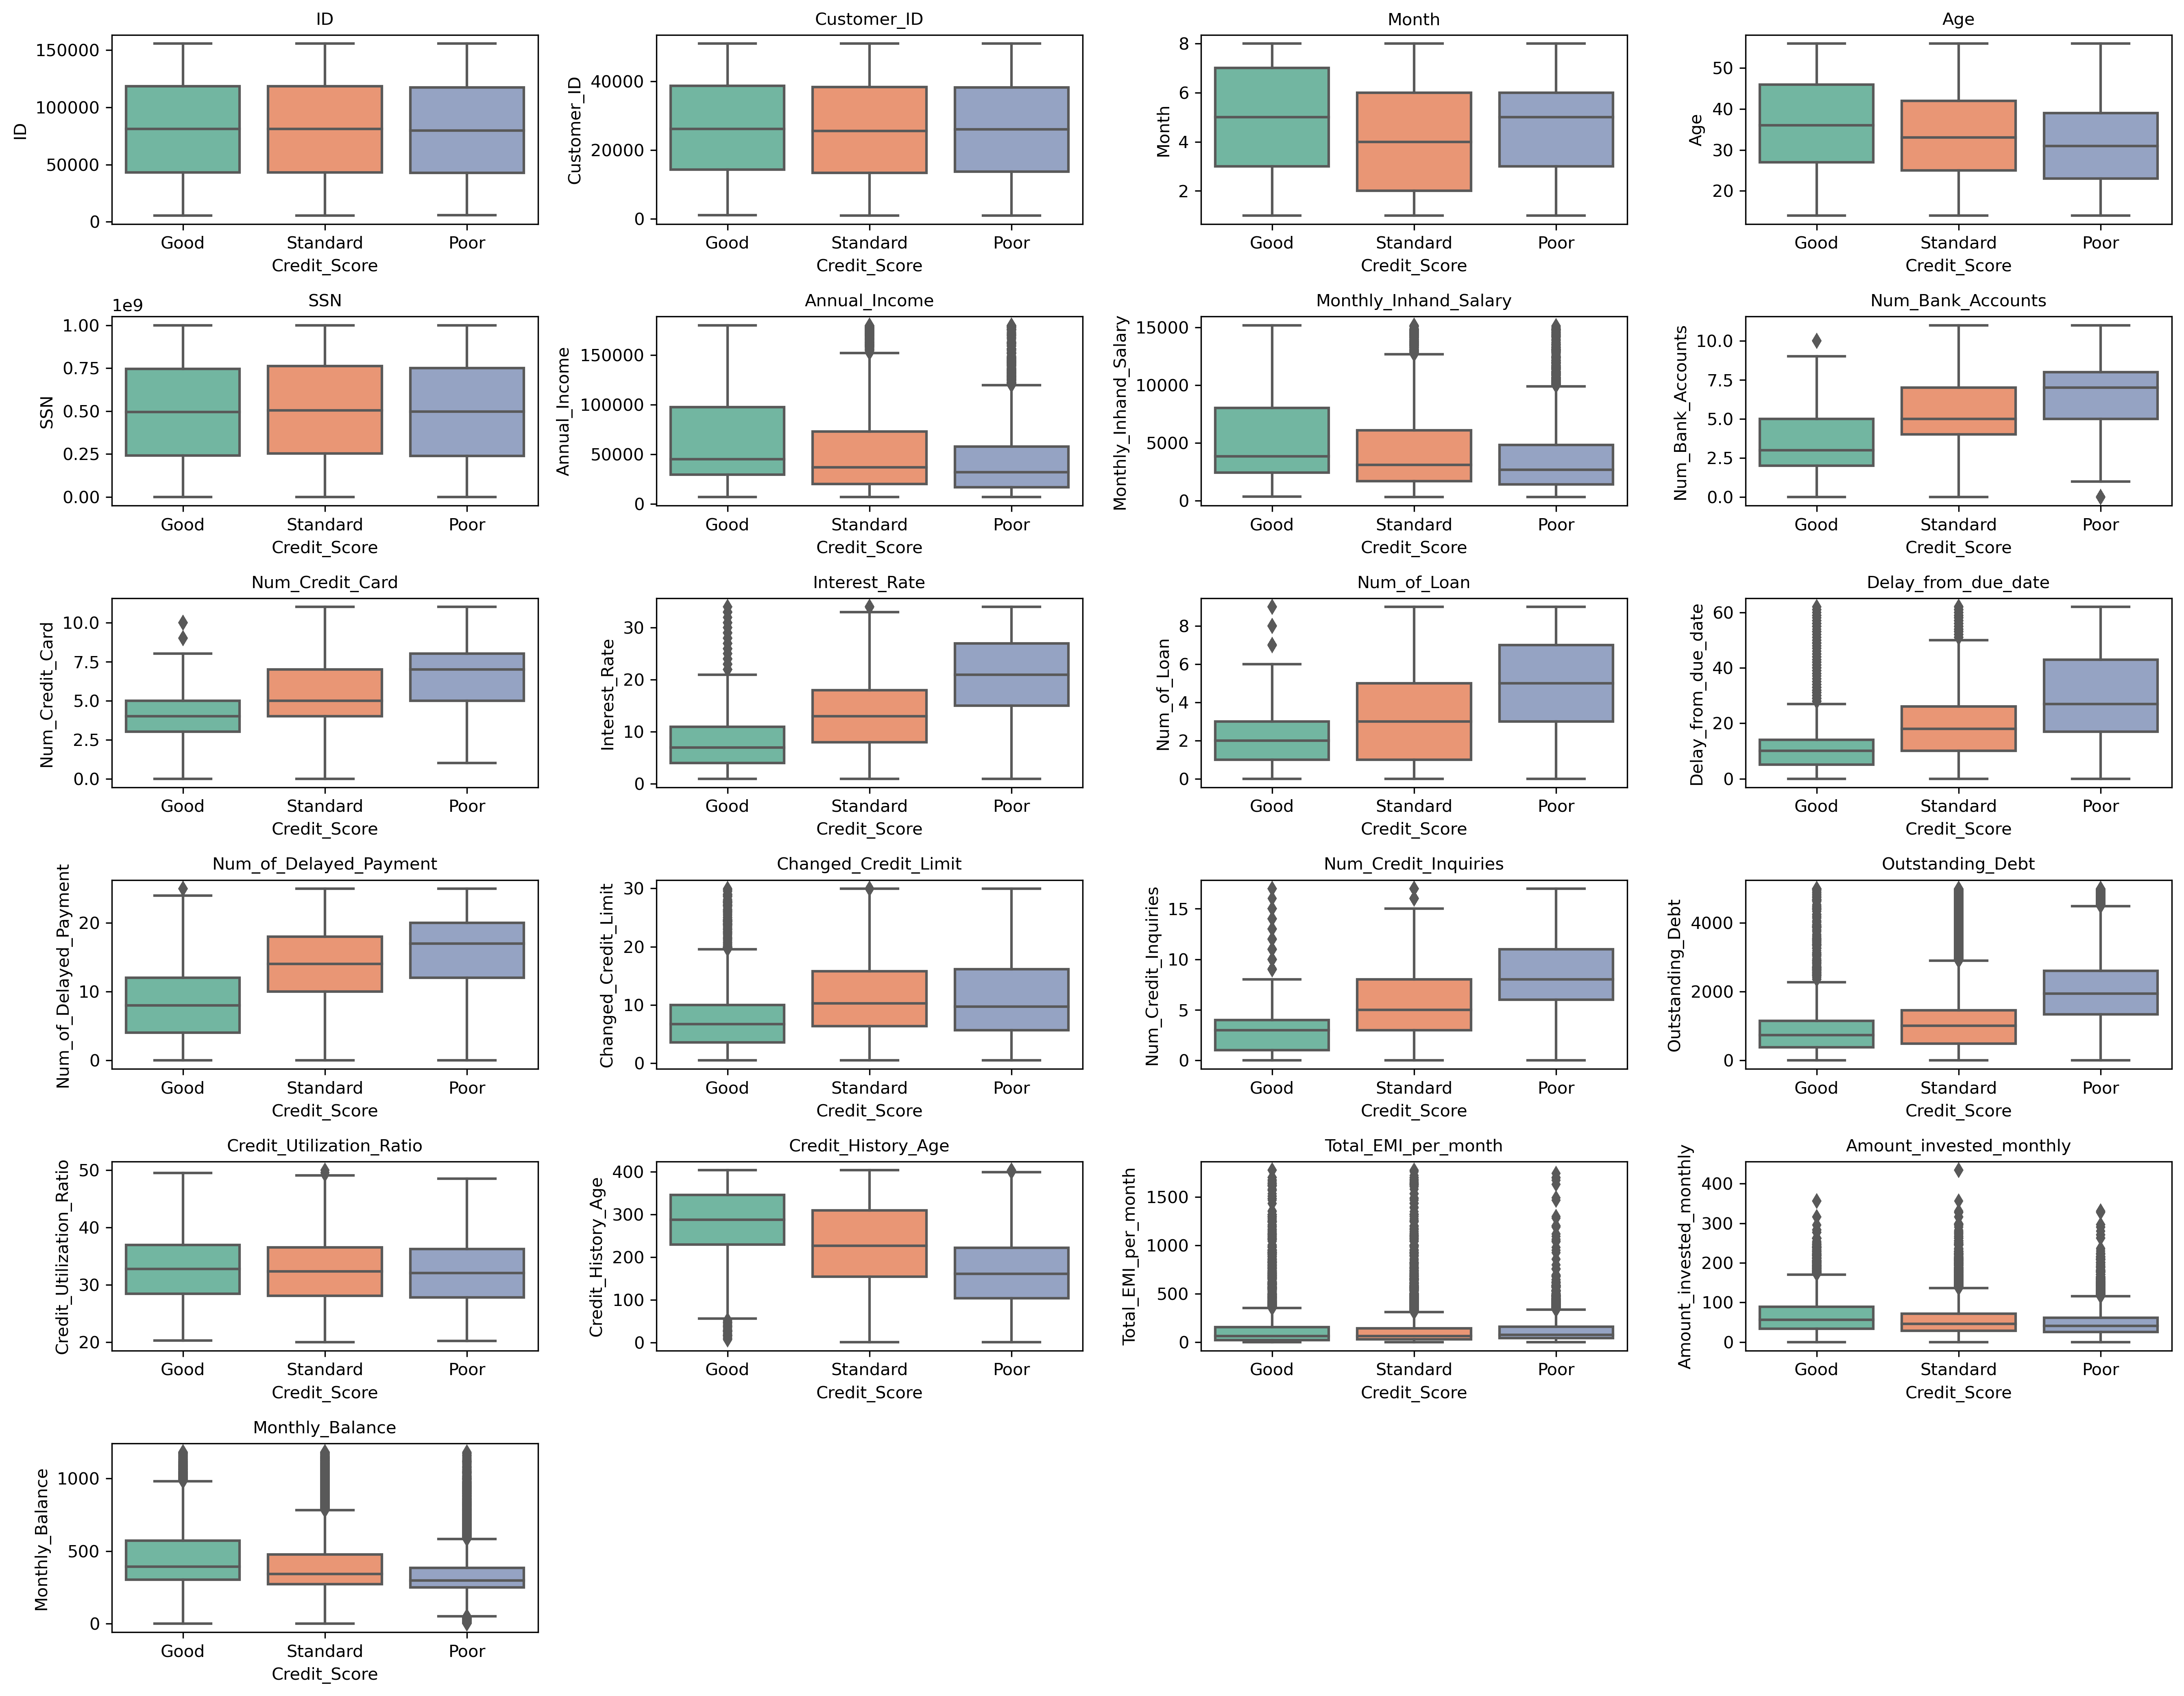

In [23]:
def make_boxplot(df, column, ax):
    sns.boxplot(x="Credit_Score", y=column, data=df, ax=ax, width=0.8, palette="Set2")
    plt.xticks(rotation=90)
    plt.title(column, fontdict={"fontsize": 10})
    plt.xticks(rotation=0)
plt.rc(("xtick", "ytick", "text"), c="k")
plt.rc("figure", dpi=80)
def plot_boxplot_num_cols(df):
    fig = plt.figure(figsize=(18, 14), dpi=300)
    numb_columns = df.select_dtypes(include="number").columns
    for column in numb_columns:
        ax = fig.add_subplot(6, 4, list(numb_columns).index(column)+1)
        make_boxplot(df, column, ax)
        plt.tight_layout(pad=0.3)
    plt.tight_layout()
    plt.show()
plot_boxplot_num_cols(df)

## Correlation

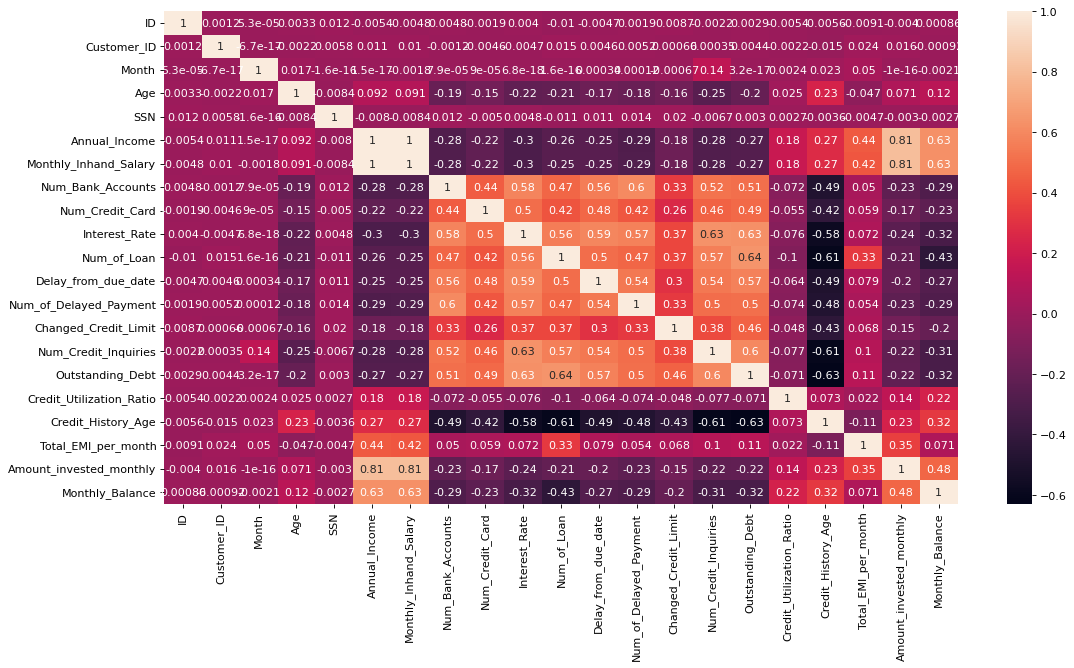

In [24]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
plt.show()

***Inference : Features 'Annual_Income' and 'Monthly_Inhand_Salary' have correlation value 1.***

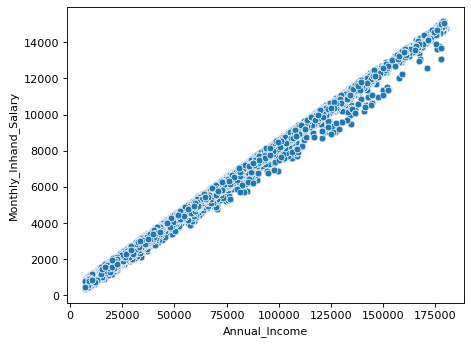

In [25]:
sns.scatterplot(x='Annual_Income',y='Monthly_Inhand_Salary',data=df)
plt.show()

***Inference : Features 'Annual_Income' and 'Monthly_Inhand_Salary' follows a positive linear relationship, as one increases other one also increases.***

# Data Pre - Processing

No duplicates and null values are there to handle

### Drop un necessary features

Drop un necessary features by assuming they don’t have any predictive power to predict the target variable

In [26]:
df.drop(['ID','Customer_ID','Month','Name','Occupation','SSN','Credit_Utilization_Ratio'],axis=1,inplace=True)

### Outlier treatment

In [27]:
outlier_columnss=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [28]:
for i in outlier_columnss:
    print('Skewness of feature',i,':',df[i].skew())

Skewness of feature Annual_Income : 1.130222566741384
Skewness of feature Monthly_Inhand_Salary : 1.1286896104040092
Skewness of feature Delay_from_due_date : 0.9698402706723249
Skewness of feature Changed_Credit_Limit : 0.7083424268261724
Skewness of feature Num_Credit_Inquiries : 0.40682536214725384
Skewness of feature Outstanding_Debt : 1.2075361955699684
Skewness of feature Total_EMI_per_month : 4.041492244076896
Skewness of feature Amount_invested_monthly : 1.7610362306626115
Skewness of feature Monthly_Balance : 1.3556137797479813


***All 9 features having outliers are skewed distributions. So use IQR (Inter Quartile Range) method for outlier detection and clip function for outlier treatment. The IQR method is robust against extreme values and is useful when dealing with non-normally distributed data. It helps to detect outliers based on the spread of the data, making it particularly suitable for skewed or heavy-tailed distribution.s***

In [29]:
for i in outlier_columnss:    
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if (j > up_lim):
            outliers.append(j)    
    df[i]=df[i].clip(upper=up_lim)

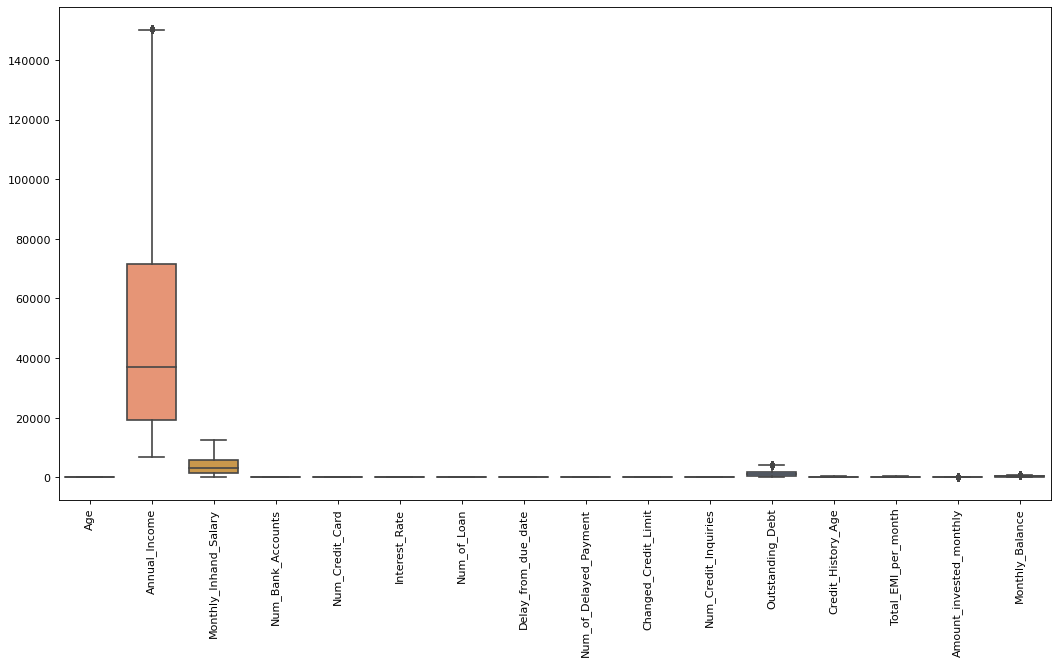

In [30]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***All outliers are treated properly. The remaining outliers are the outliers of newly transformed data.***

### Replace 'NM' (Not Mentioned) with 'No'

In [31]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [32]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

### Ordinal encoding

In [33]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [34]:
Payment_Behaviour_categories=['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments',
                          'High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']
Payment_Behaviour_encoder=OrdinalEncoder(categories=[Payment_Behaviour_categories])
df['Payment_Behaviour']=Payment_Behaviour_encoder.fit_transform(df[['Payment_Behaviour']])

In [35]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [36]:
Credit_Mix_categories=['Bad','Standard','Good']
Credit_Mix_encoder=OrdinalEncoder(categories=[Credit_Mix_categories])
df['Credit_Mix']=Credit_Mix_encoder.fit_transform(df[['Credit_Mix']])

In [37]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [38]:
Credit_Score_categories=['Poor','Standard','Good']
Credit_Score_encoder=OrdinalEncoder(categories=[Credit_Score_categories])
df['Credit_Score']=Credit_Score_encoder.fit_transform(df[['Credit_Score']])

### Label encoding

Apply label encoding to remaining 2 features

In [39]:
categorical_columns=['Type_of_Loan','Payment_of_Min_Amount']              
le=LabelEncoder()
for i in categorical_columns:
    df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Monthly_Inhand_Salary    100000 non-null  float64
 3   Num_Bank_Accounts        100000 non-null  float64
 4   Num_Credit_Card          100000 non-null  float64
 5   Interest_Rate            100000 non-null  float64
 6   Num_of_Loan              100000 non-null  float64
 7   Type_of_Loan             100000 non-null  int32  
 8   Delay_from_due_date      100000 non-null  float64
 9   Num_of_Delayed_Payment   100000 non-null  float64
 10  Changed_Credit_Limit     100000 non-null  float64
 11  Num_Credit_Inquiries     100000 non-null  float64
 12  Credit_Mix               100000 non-null  float64
 13  Outstanding_Debt         100000 non-null  float64
 14  Credi

***All categorical features are converted to numerical features now.***

### Drop feature by correlation method

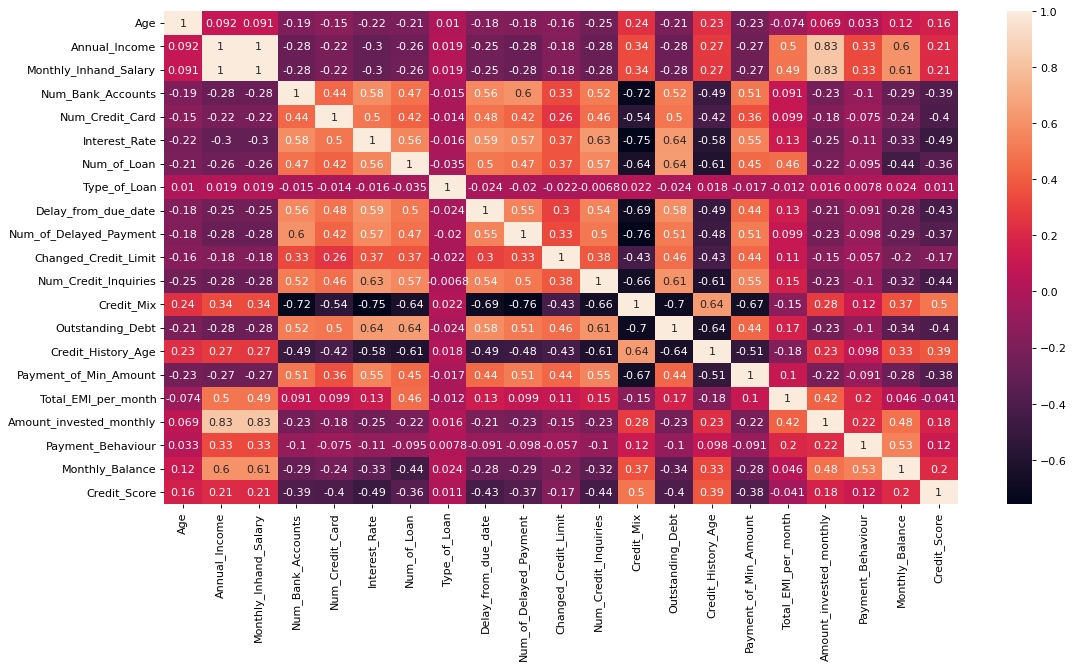

In [40]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

***Since 'Annual_Income' and 'Monthly_Inhand_Salary' are highly correlated (correlation value=1), drop any one among them (Both of them have the same correlation value with target variable).***

In [41]:
df.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

### Seperating the target (y) and independent variables (x)

In [42]:
x=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']
y=pd.DataFrame(y,columns=['Credit_Score'])

### Standard scaling x data

Do Standard Scaling in order to transform all numerical variables to have a similar scale, so that they can be compared more easily

In [43]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x=pd.DataFrame(x_sc,columns=x.columns)

###  Data split

Divide the data into training, testing, and validation sets for model development in the ratio 70:20:10

In [44]:
x_rem,x_test,y_rem,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True,stratify=y)

In [45]:
x_train,x_val,y_train,y_val=train_test_split(x_rem,y_rem,random_state=42,test_size=0.1,shuffle=True,stratify=y_rem)

### Balancing the train data with oversampling

Random oversampling is randomly duplicating examples in the minority class. Importantly, the change to the class distribution is only applied to the training data. The intent is to influence the fit of the models. The resampling is not applied to the test or validation data used to evaluate the performance of a model.

In [46]:
train= pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)
sampler = RandomOverSampler()
x_train_balanced, y_train_balanced = sampler.fit_resample(x_train, y_train)
train_balanced = pd.concat([pd.DataFrame(x_train_balanced), pd.DataFrame(y_train_balanced)], axis=1)

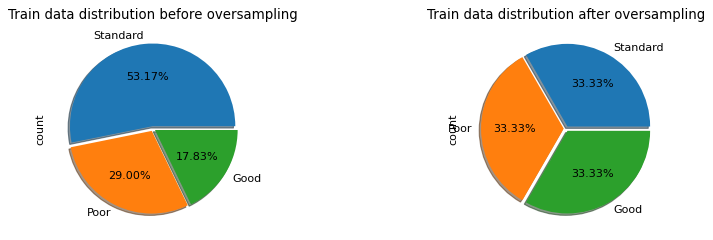

In [47]:
fig,axes = plt.subplots(1, 2,figsize=(10,10))
train_balanced["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],ax=axes[1])
axes[1].set_title('Train data distribution after oversampling')
train["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],ax=axes[0])
axes[0].set_title('Train data distribution before oversampling')
plt.subplots_adjust(wspace=1)
plt.show()

***Now the train data got balanced.***

In [48]:
x_train.shape

(72000, 19)

In [49]:
x_train_balanced.shape

(114855, 19)

In [50]:
x_test.shape

(20000, 19)

In [51]:
x_val.shape

(8000, 19)

In [52]:
y_train.shape

(72000, 1)

In [53]:
y_train_balanced.shape

(114855, 1)

In [54]:
y_test.shape

(20000, 1)

In [55]:
y_val.shape

(8000, 1)